In [1]:
import numpy as np # used for arrays

import gym # pull the environment

import time # to get the time

import math # needed for calculations


import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

In [2]:
env = gym.make("CartPole-v1")
print(env.action_space.n)

LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 60000
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

epsilon = 1

epsilon_decay_value = 0.99995

2


In [3]:
q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape

(30, 30, 50, 50, 2)

In [4]:


def get_discrete_state(state):
   
    discrete_state = state / np_array_win_size + np.array([15, 10, 1, 10])
    #print(state,discrete_state)
    return tuple(discrete_state.astype(np.int))


In [5]:
for episode in range(EPISODES + 1): 
    t0 = time.time() 
    discrete_state = get_discrete_state(env.reset()[0])
    done = False
    episode_reward = 0 

    #print(episode)
 

    if episode % 2000 == 0: 
        print("Episode: " + str(episode))
        

    while not done: 

        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state]) 
            
        else:
           
            action = np.random.randint(0, env.action_space.n) 

       
        new_state, reward, done, nil , _ = env.step(action) 

        episode_reward += reward 

        new_discrete_state = get_discrete_state(new_state)
        
        if episode % 2000 == 0: 
            env.render()

        
           

        if not done: 
            
            
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.05: 
        if episode_reward > prior_reward and episode > 10000:
            epsilon = math.pow(epsilon_decay_value, episode - 10000)

            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))
        

            



    t1 = time.time() 
    episode_total = t1 - t0 
    total = total + episode_total

    total_reward += episode_reward 
    prior_reward = episode_reward

    if episode % 1000 == 0: 
        mean = total / 1000
        print("Time Average: " + str(mean))
        total = 0

        mean_reward = total_reward / 1000
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0

env.close()

Episode: 0
Time Average: 1.825094223022461e-06
Mean Reward: 0.034


/var/folders/bg/p09k60990slfl_mz2vbnm5vw0000gn/T/ipykernel_59704/417261002.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Time Average: 0.000363034725189209
Mean Reward: 22.934
Episode: 2000
Time Average: 0.0003518097400665283
Mean Reward: 22.273
Time Average: 0.0003257036209106445
Mean Reward: 22.03
Episode: 4000
Time Average: 0.0003334007263183594
Mean Reward: 21.437
Time Average: 0.00032359814643859863
Mean Reward: 21.931
Episode: 6000
Time Average: 0.0003158245086669922
Mean Reward: 22.259
Time Average: 0.00033723783493041994
Mean Reward: 22.579
Episode: 8000
Time Average: 0.00033283782005310056
Mean Reward: 22.634
Time Average: 0.00033444571495056154
Mean Reward: 22.361
Episode: 10000
Time Average: 0.00033573174476623537
Mean Reward: 21.748
Time Average: 0.00034241247177124024
Mean Reward: 23.505
Epsilon: 0.9277417467531685
Episode: 12000
Time Average: 0.00035610103607177734
Mean Reward: 24.151
Epsilon: 0.8824941446941661
Epsilon: 0.8607047486686201
Time Average: 0.0003732798099517822
Mean Reward: 25.347
Episode: 14000
Time Average: 0.00039419984817504883
Mean Reward: 27.339
Epsilon: 0.77879591541948

459.0


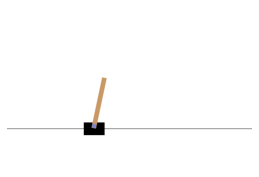

In [38]:
import gym
import matplotlib.pyplot as plt
from IPython import display
import numpy as np


def rand_policy_agent(observation):
    return random.randint(0, 1)
     

totalreward = 0
# Create CartPole-v1 environment
env = gym.make('CartPole-v1',render_mode='rgb_array')

# Reset environment
observation = env.reset()[0]
discrete_state = get_discrete_state(observation)
# Display the environment
plt.figure(figsize=(9, 3))
img = plt.imshow(np.zeros((400, 600, 3)))

# Loop to take random actions until episode ends
done = False
while not done:
# Render the environment
    screen = env.render()
    
    action = np.argmax(q_table[discrete_state]) 
    

    observation, reward, done,nil, _ = env.step(action)
    discrete_state = get_discrete_state(observation)

    totalreward += reward
    
    img.set_data(screen)
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)

# Close the environment
print(totalreward)
env.close()




In [57]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data=''''''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
     

totalreward = 0


env = RecordVideo(gym.make('CartPole-v1',render_mode='rgb_array'), "./video",)
observation = env.reset()
discrete_state = get_discrete_state(observation[0])

while True:
    #env.render()
    #your agent goes here
    action = np.argmax(q_table[discrete_state]) 
    
    observation, reward, done, info, _ = env.step(action) 
    discrete_state = get_discrete_state(observation)
    totalreward += reward

    if done: 
      print(totalreward)
      break;    
env.close()
show_video()

/var/folders/bg/p09k60990slfl_mz2vbnm5vw0000gn/T/ipykernel_59704/417261002.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Moviepy - Building video /Users/weihong/Desktop/weihong/AI/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/weihong/Desktop/weihong/AI/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/weihong/Desktop/weihong/AI/video/rl-video-episode-0.mp4
657.0


/var/folders/bg/p09k60990slfl_mz2vbnm5vw0000gn/T/ipykernel_59704/417261002.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


In [65]:
import glob

files = glob.glob(f'{env.video_folder}/{env.name_prefix}*.mp4')
files

['/Users/weihong/Desktop/weihong/AI/video/rl-video-episode-0.mp4']

In [72]:
#from IPython.display import Video

from ipywidgets import Video

print(files[0])
Video.from_file(files[0], embed=True)

/Users/weihong/Desktop/weihong/AI/video/rl-video-episode-0.mp4


Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free...')